In [1]:
import wave
import numpy as np
from matplotlib import pylab as plt
import struct
import pyaudio
import pandas

In [2]:
a = 1  # amplitude
fs = 8000  # sampling freq.
f0 = 440  # freq.
sec = 1  # sec.

swav = []
for n in np.arange(fs * sec):
    # make sin wave
    s = a * np.sin(2.0 * np.pi * f0 * n / fs)
    swav.append(s)

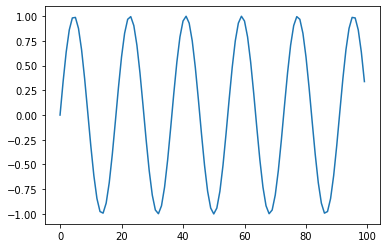

In [3]:
plt.plot(swav[0:100])
plt.show()

In [4]:
def play_wav(wav_path):
    try:
        wf = wave.open(wav_path, "r")
    except FileNotFoundError as e:
        raise e
    # open stream
    p = pyaudio.PyAudio()
    stream = p.open(format=p.get_format_from_width(wf.getsampwidth()),
                    channels=wf.getnchannels(),
                    rate=wf.getframerate(),
                    output=True)
    # play audio
    chunk = 1024
    data = wf.readframes(chunk)
    while data != b"":
        stream.write(data)
        data = wf.readframes(chunk)
    stream.close()
    p.terminate()
    wf.close()
    
def play_binary(binwave, fs, nchannels=1):
    bit = 16
    p = pyaudio.PyAudio()
    stream = p.open(format=pyaudio.paInt16,
                    channels=nchannels,
                    rate=int(fs),
                    output=True)
    chunk = 1024
    sp = 0 # pointer of play position
    data = binwave[sp:sp+chunk]
    while data != b"":
        stream.write(data)
        sp = sp + chunk
        data = binwave[sp:sp+chunk]
    stream.close()
    p.terminate()
    
def make_binary(A=1, fs=8000, f0=440, sec=1):
    """
    Args:
        A: amplitude 
        fs: sampling frequency
        f0: fundamental frequency
        sec: generate seconds
    Return:
        binary
    """
    swav = []
    for n in np.arange(fs * sec):
        # make sin wave
        s = A * np.sin(2.0 * np.pi * f0 * n / fs)
        # clip by large amplitude
        if s > 1.0: s = 1.0
        if s < -1.0: s = -1.0
        # to be signed 16bit integer
        s = (s * 32767.0).astype(np.int16)  # float to signed int16
        swav.append(s)
    binwave = struct.pack("h" * len(swav), *swav)  # h => type short
    return binwave

def make_wav(binwave, wav_path,
             nchannels=1, sampwidth=2, framerate=8000, comptype="NONE", compname="not complessed"):
    nframes = len(binwave)
    w = wave.Wave_write(wav_path)
    p = (nchannels, sampwidth, framerate, nframes, comptype, compname)
    w.setparams(p)
    w.writeframes(binwave)
    w.close()

In [5]:
class ScaleHandler:
    def __init__(self, csv_path="./scale.csv"):
        self.df = pandas.read_csv(csv_path)  # dataframe
        
    def get_freq(self, scalename):
        """
        scalename can be "A0" to "C8", use "#" not "b".
        """
        return self.df[self.df.name == scalename].freq

In [6]:
a = 1
fs = 8000
sec = 1
filename = "output.wav"

sh = ScaleHandler()
freq = sh.get_freq("A5")

b = make_binary(a, fs, int(freq), sec)
make_wav(b, filename)
play_wav(filename)

In [7]:
a = 1
fs = 8000
sec = 1
sh = ScaleHandler()

for n in ["C4", "D4", "E4", "F4", "G4", "A4", "B4", "C5"]:
    freq = sh.get_freq(n)
    b = make_binary(a, fs, int(freq), sec)
    play_binary(b, fs)

In [ ]:
def make_combined_binary(A=1, fs=8000, f0s=(440), sec=1):
    """
    Args:
        A: amplitude 
        fs: sampling frequency
        f0s (tuple) : fundamental frequencies
        sec: generate seconds
    Return:
        binary
    """
    swav = []
    amp = float(A) / len(f0s)
    for n in np.arange(fs * sec):
        s = 0.
        # make sin wave
        for f0 in f0s:
            s += amp * np.sin(2.0 * np.pi * f0 * n / fs)
        # clip by large amplitude
        if s > 1.0: s = 1.0
        if s < -1.0: s = -1.0
        # to be signed 16bit integer
        s = (s * 32767.0).astype(np.int16)  # float to signed int16
        swav.append(s)
    binwave = struct.pack("h" * len(swav), *swav)  # h => type short
    return binwave

In [ ]:
a = 1
fs = 8000
sec = 1
sh = ScaleHandler()

chord_C4 = ["C4", "E4", "G4"]
f0s = tuple([int(sh.get)])